The purpose of this file is to represent the location of EDA files.

For the full eda (this file is part of a tutorial focused on machine learning deployment rather than eda and model building), follow the link below.

https://github.com/krishnaik06/mlproject/blob/main/notebook/1%20.%20EDA%20STUDENT%20PERFORMANCE%20.ipynb

# Life cycle fo Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose Best Model

## 1.) Problem Statement

*This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch, and Test Prepartion Course.

## 2.) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
* The data set consists of 8 columns and 1000 rows.

# 2.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Show Top 5 Records

In [5]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [6]:
df.shape

(1000, 8)

# 2.2 Dataset Information

* gender: sex of students -> (Male/Female)
* race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
* parental level of education: parents' final education => (bachelor's degree, some college, master's degree, associate's degree, high school)
* lunch: having lunch before test (standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

# 3. Data Checks to Perform

* Missing values
* Duplicates
* Data types
* Number fo unique values of each column
* Statistics of data set
* Check various categories present in the different categorical column

## 3.1 Check Missing Values

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

## 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicate values in the data set.

## 3.3 Check Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check the Number of Unique Values in each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 Check Statistics of the Data Set

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

* From the above description of the numerical data, all means are very close to each other - between 66.08 and 69.17
* All standard deviations are also close - between 14.6 and 15.2
* While there is a minimum score of 0 for math, the minimum for writing is much higher (10.0) and the minimum for reading is even higher (17.0)

## 3.7 Exploring Data

In [15]:
for col in list(df.columns):
    print("Categories in '{}' variable:    ".format(col), end=" ")
    print(df[col].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']
Categories in 'math score' variable:     [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in 'reading score' variable:     [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41 

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.8 Adding Columns for "Total Score" and "Average"

In [17]:
df["total score"] = df["math score"] + df["writing score"] + df["writing score"]
df["average"] = df["total score"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,220,73.333333
1,female,group C,some college,standard,completed,69,90,88,245,81.666667
2,female,group B,master's degree,standard,none,90,95,93,276,92.000000
3,male,group A,associate's degree,free/reduced,none,47,57,44,135,45.000000
4,male,group C,some college,standard,none,76,78,75,226,75.333333


In [18]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [21]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 score in Reading: {reading_less_20}')
print(f'Number of students with less than 20 score in Writing: {writing_less_20}')
print(f'Number of students with less than 20 score in Math: {math_less_20}')

Number of students with less than 20 score in Reading: 1
Number of students with less than 20 score in Writing: 3
Number of students with less than 20 score in Math: 4


### Insights

* From the above values, we can see that students perfomed the worst in Math.
* The best performance is in the reading section.

# 4. Exploring Data (Visualization)

## 4.1 Visualize the Average Score Distribution to make some conclusion

* Histogram
* Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

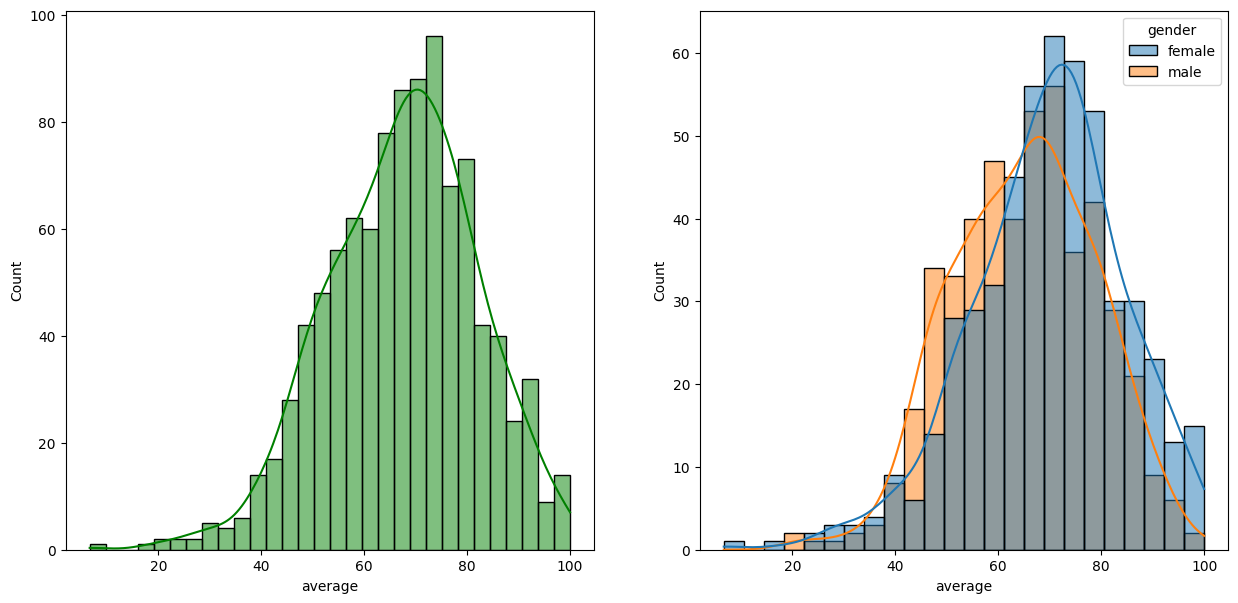

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

### Insights

* Female students tend to perform better than male students.

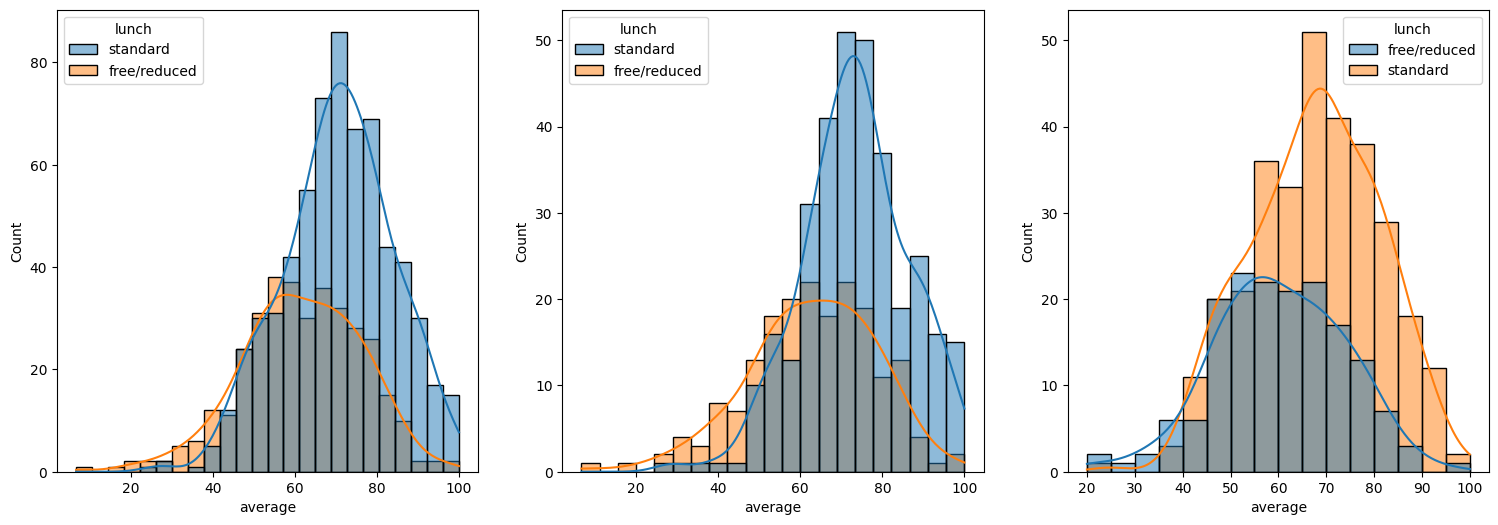

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

### Insights

* Standard lunch helps perform well in exams.
* Standard lunch helps both genders perfrom better in exams.

# Remaining EDA

https://github.com/krishnaik06/mlproject/blob/main/notebook/1%20.%20EDA%20STUDENT%20PERFORMANCE%20.ipynb